# Submission Akhir: Menyelesaikan Permasalahan Institusi Pendidikan
- **Nama: Rijal Akhdan Khairulah**
- **Email: rijal.akhdan.khairullah@gmail.com**
- **ID Dicoding: rijal_akhdan**

# Background


***Peringatan!***

>*Skenario dalam proyek ini hanyalah fiktif belaka. Apabila terdapat kesamaan nama tokoh, perusahaan, ataupun produk, itu adalah kebetulan semata dan tidak ada unsur kesengajaan.*


Jaya Jaya Institut merupakan salah satu institusi pendidikan perguruan yang telah berdiri sejak tahun 2000. Hingga saat ini ia telah mencetak banyak lulusan dengan reputasi yang sangat baik. Akan tetapi, terdapat banyak juga siswa yang tidak menyelesaikan pendidikannya alias dropout.

Jumlah dropout yang tinggi ini tentunya menjadi salah satu masalah yang besar untuk sebuah institusi pendidikan. Oleh karena itu, Jaya Jaya Institut ingin mendeteksi secepat mungkin siswa yang mungkin akan melakukan dropout sehingga dapat diberi bimbingan khusus.

Nah, sebagai calon data scientist masa depan Anda diminta untuk membantu Jaya Jaya Institut dalam menyelesaikan permasalahannya. Selain itu, mereka juga meminta Anda untuk membuatkan dashboard agar mereka mudah dalam memahami data dan memonitor performa siswa.





## Import Semua Packages/Library yang Digunakan

In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Data Preparation

### Data Loading

In [2]:
df = pd.read_csv('/content/data.csv', sep=';')

In [3]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## EDA (Exploratory Data Analysis)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
# Ukuran dataset
print(f"Jumlah baris dan kolom: {df.shape}")

Jumlah baris dan kolom: (4424, 37)


In [6]:
# Statistik deskriptif
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [7]:
# Memeriksa jumlah data yang hilang
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment      

## Visualization

In [8]:
# --- Visualization Functions ---
def plot_categorical_columns(df, cat_cols, custom_labels=None):
    for col in cat_cols:
        plt.figure(figsize=(8, 5))

        # Ambil value counts original
        original_value_counts = df[col].value_counts()

        # Proses mapping label dan penggabungan kategori
        if custom_labels and col in custom_labels:
            # Buat Series dengan label yang sudah di-mapping
            mapped_series = original_value_counts.index.map(
                lambda x: custom_labels[col].get(x, "Unknown")  # Handle nilai yang tidak ada di kamus
            )
            labels = mapped_series.tolist()
            values = original_value_counts.values

            # Gabungkan kategori minor jika total kategori > 7
            if len(labels) > 7:
                # Ambil 5 kategori teratas
                top_5_labels = labels[:5]
                top_5_values = values[:5]

                # Hitung total kategori "Others"
                others_sum = sum(values[5:])

                # Gabungkan ke dalam list baru
                labels = top_5_labels + ["Others"]
                values = np.append(top_5_values, others_sum)
        else:
            labels = original_value_counts.index.astype(str).tolist()
            values = original_value_counts.values

        # Buat plot dengan label yang sudah diproses
        ax = sns.barplot(x=labels, y=values, palette="Set2", order=labels)
        plt.title(f'Distribusi Frekuensi: {col}')

        # Rotasi label untuk keterbacaan
        ax.set_xticklabels(labels, rotation=45, ha='right')

        plt.tight_layout()
        plt.show()

def plot_numerical_distributions(df, num_cols):
    for col in num_cols:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], kde=True, bins=25, color='skyblue')
        plt.title(f'Distribusi Data {col}')
        plt.tight_layout()
        plt.show()

def plot_correlation_heatmap(df):
    corr = df.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(24, 15))
    sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

def plot_feature_correlations(df, target):
    corr = df.corr(numeric_only=True)[target].drop(target).sort_values()
    plt.figure(figsize=(18, 6))
    sns.barplot(x=corr.index, y=corr.values, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.ylabel('Pearson Correlation')
    plt.title(f'Correlation of Features with {target}')
    plt.tight_layout()
    plt.show()

def plot_swarm_features(df, features, target):
    for feat in features:
        plt.figure(figsize=(8, 5))
        sns.swarmplot(data=df, y=feat, x=target, palette='pastel')
        plt.title(f'{feat} by {target}')
        plt.tight_layout()
        plt.show()

def plot_pie_distribution(df, target_col):
    dist = df[target_col].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(dist.values, labels=dist.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title(f'Proporsi Kategori {target_col}')
    plt.tight_layout()
    plt.show()

In [9]:
# --- Identification ---
numerical_columns = [
    'Application_order',
    'Previous_qualification',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations',
    'Unemployment_rate',
    'Inflation_rate',
    'GDP'
]

categorical_columns = [
    'Marital_status',
    'Application_mode',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Nacionality',
    "Mothers_qualification",
    "Fathers_qualification",
    "Mothers_occupation",
    "Fathers_occupation",
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder',
    'International',
    'Status'
]

In [10]:
custom_labels = {
    'Marital_status': {
        1: 'Single',
        2: 'Married',
        3: 'Widower',
        4: 'Divorced',
        5: 'Facto union',
        6: 'Legally separated'
    },
    'Application_mode': {
        1: '1st phase - general contingent',
        2: 'Ordinance No. 612/93',
        5: '1st phase - special contingent (Azores Island)',
        7: 'Holders of other higher courses',
        10: 'Ordinance No. 854-B/99',
        15: 'International student (bachelor)',
        16: '1st phase - special contingent (Madeira Island)',
        17: '2nd phase - general contingent',
        18: '3rd phase - general contingent',
        26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
        27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
        39: 'Over 23 years old',
        42: 'Transfer',
        43: 'Change of course',
        44: 'Technological specialization diploma holders',
        51: 'Change of institution/course',
        53: 'Short cycle diploma holders',
        57: 'Change of institution/course (International)'
    },
    'Course': {
        33: 'Biofuel Production Technologies',
        171: 'Animation and Multimedia Design',
        8014: 'Social Service (evening attendance)',
        9003: 'Agronomy',
        9070: 'Communication Design',
        9085: 'Veterinary Nursing',
        9119: 'Informatics Engineering',
        9130: 'Equinculture',
        9147: 'Management',
        9238: 'Social Service',
        9254: 'Tourism',
        9500: 'Nursing',
        9556: 'Oral Hygiene',
        9670: 'Advertising and Marketing Management',
        9773: 'Journalism and Communication',
        9853: 'Basic Education',
        9991: 'Management (evening attendance)'
    },
    'Daytime_evening_attendance': {
        1: 'Daytime',
        0: 'Evening'
    },
    'Previous_qualification': {
        1: 'Secondary education',
        2: 'Higher education - bachelor\'s degree',
        3: 'Higher education - degree',
        4: 'Higher education - master\'s',
        5: 'Higher education - doctorate',
        6: 'Frequency of higher education',
        9: '12th year of schooling - not completed',
        10: '11th year of schooling - not completed',
        12: 'Other - 11th year of schooling',
        14: '10th year of schooling',
        15: '10th year of schooling - not completed',
        19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
        38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        42: 'Professional higher technical course',
        43: 'Higher education - master (2nd cycle)'
    },
    'Nacionality': {
        1: 'Portuguese',
        2: 'German',
        6: 'Spanish',
        11: 'Italian',
        13: 'Dutch',
        14: 'English',
        17: 'Lithuanian',
        21: 'Angolan',
        22: 'Cape Verdean',
        24: 'Guinean',
        25: 'Mozambican',
        26: 'Santomean',
        32: 'Turkish',
        41: 'Brazilian',
        62: 'Romanian',
        100: 'Moldova (Republic of)',
        101: 'Mexican',
        103: 'Ukrainian',
        105: 'Russian',
        108: 'Cuban',
        109: 'Colombian'
    },
    'Mothers_qualification': {
        1: 'Secondary Education - 12th Year of Schooling or Eq.',
        2: 'Higher Education - Bachelor\'s Degree',
        3: 'Higher Education - Degree',
        4: 'Higher Education - Master\'s',
        5: 'Higher Education - Doctorate',
        6: 'Frequency of Higher Education',
        9: '12th Year of Schooling - Not Completed',
        10: '11th Year of Schooling - Not Completed',
        11: '7th Year (Old)',
        12: 'Other - 11th Year of Schooling',
        14: '10th Year of Schooling',
        18: 'General commerce course',
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
        22: 'Technical-professional course',
        26: '7th year of schooling',
        27: '2nd cycle of the general high school course',
        29: '9th Year of Schooling - Not Completed',
        30: '8th year of schooling',
        34: 'Unknown',
        35: 'Can\'t read or write',
        36: 'Can read without having a 4th year of schooling',
        37: 'Basic education 1st cycle (4th/5th year) or equiv.',
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        41: 'Specialized higher studies course',
        42: 'Professional higher technical course',
        43: 'Higher Education - Master (2nd cycle)',
        44: 'Higher Education - Doctorate (3rd cycle)'
    },
    'Fathers_qualification': {
        1: 'Secondary Education - 12th Year of Schooling or Eq.',
        2: 'Higher Education - Bachelor\'s Degree',
        3: 'Higher Education - Degree',
        4: 'Higher Education - Master\'s',
        5: 'Higher Education - Doctorate',
        6: 'Frequency of Higher Education',
        9: '12th Year of Schooling - Not Completed',
        10: '11th Year of Schooling - Not Completed',
        11: '7th Year (Old)',
        12: 'Other - 11th Year of Schooling',
        13: '2nd year complementary high school course',
        14: '10th Year of Schooling',
        18: 'General commerce course',
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
        20: 'Complementary High School Course',
        22: 'Technical-professional course',
        25: 'Complementary High School Course - not concluded',
        26: '7th year of schooling',
        27: '2nd cycle of the general high school course',
        29: '9th Year of Schooling - Not Completed',
        30: '8th year of schooling',
        31: 'General Course of Administration and Commerce',
        33: 'Supplementary Accounting and Administration',
        34: 'Unknown',
        35: 'Can\'t read or write',
        36: 'Can read without having a 4th year of schooling',
        37: 'Basic education 1st cycle (4th/5th year) or equiv.',
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        41: 'Specialized higher studies course',
        42: 'Professional higher technical course',
        43: 'Higher Education - Master (2nd cycle)',
        44: 'Higher Education - Doctorate (3rd cycle)'
    },
    'Mothers_occupation': {
        0: 'Student',
        1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
        2: 'Specialists in Intellectual and Scientific Activities',
        3: 'Intermediate Level Technicians and Professions',
        4: 'Administrative staff',
        5: 'Personal Services, Security and Safety Workers and Sellers',
        6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
        7: 'Skilled Workers in Industry, Construction and Craftsmen',
        8: 'Installation and Machine Operators and Assembly Workers',
        9: 'Unskilled Workers',
        10: 'Armed Forces Professions',
        90: 'Other Situation',
        99: '(blank)',
        122: 'Health professionals',
        123: 'Teachers',
        125: 'Specialists in information and communication technologies (ICT)',
        131: 'Intermediate level science and engineering technicians and professions',
        132: 'Technicians and professionals, of intermediate level of health',
        134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
        141: 'Office workers, secretaries in general and data processing operators',
        143: 'Data, accounting, statistical, financial services and registry-related operators',
        144: 'Other administrative support staff',
        151: 'Personal service workers',
        152: 'Sellers',
        153: 'Personal care workers and the like',
        171: 'Skilled construction workers and the like, except electricians',
        173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
        175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
        191: 'Cleaning workers',
        192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
        193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
        194: 'Meal preparation assistants'
    },
    'Fathers_occupation': {
        0: 'Student',
        1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
        2: 'Specialists in Intellectual and Scientific Activities',
        3: 'Intermediate Level Technicians and Professions',
        4: 'Administrative staff',
        5: 'Personal Services, Security and Safety Workers and Sellers',
        6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
        7: 'Skilled Workers in Industry, Construction and Craftsmen',
        8: 'Installation and Machine Operators and Assembly Workers',
        9: 'Unskilled Workers',
        10: 'Armed Forces Professions',
        90: 'Other Situation',
        99: '(blank)',
        101: 'Armed Forces Officers',
        102: 'Armed Forces Sergeants',
        103: 'Other Armed Forces personnel',
        112: 'Directors of administrative and commercial services',
        114: 'Hotel, catering, trade and other services directors',
        121: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
        122: 'Health professionals',
        123: 'Teachers',
        124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
        131: 'Intermediate level science and engineering technicians and professions',
        132: 'Technicians and professionals, of intermediate level of health',
        134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
        135: 'Information and communication technology technicians',
        141: 'Office workers, secretaries in general and data processing operators',
        143: 'Data, accounting, statistical, financial services and registry-related operators',
        144: 'Other administrative support staff',
        151: 'Personal service workers',
        152: 'Sellers',
        153: 'Personal care workers and the like',
        154: 'Protection and security services personnel',
        161: 'Market-oriented farmers and skilled agricultural and animal production workers',
        163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
        171: 'Skilled construction workers and the like, except electricians',
        172: 'Skilled workers in metallurgy, metalworking and similar',
        174: 'Skilled workers in electricity and electronics',
        175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
        181: 'Fixed plant and machine operators',
        182: 'Assembly workers',
        183: 'Vehicle drivers and mobile equipment operators',
        192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
        193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
        194: 'Meal preparation assistants',
        195: 'Street vendors (except food) and street service providers'
    },
    'Displaced': {
        1: 'Yes',
        0: 'No'
    },
    'Educational_special_needs': {
        1: 'Yes',
        0: 'No'
    },
    'Debtor': {
        1: 'Yes',
        0: 'No'
    },
    'Tuition_fees_up_to_date': {
        1: 'Yes',
        0: 'No'

    },
    'Gender': {
        1: 'Male',
        0: 'Female'
    },
    'Scholarship_holder': {
        1: 'Yes',
        0: 'No'
    },
    'International': {
        1: 'Yes',
        0: 'No'
    }
}

### Visualisasi Data Kategorikal

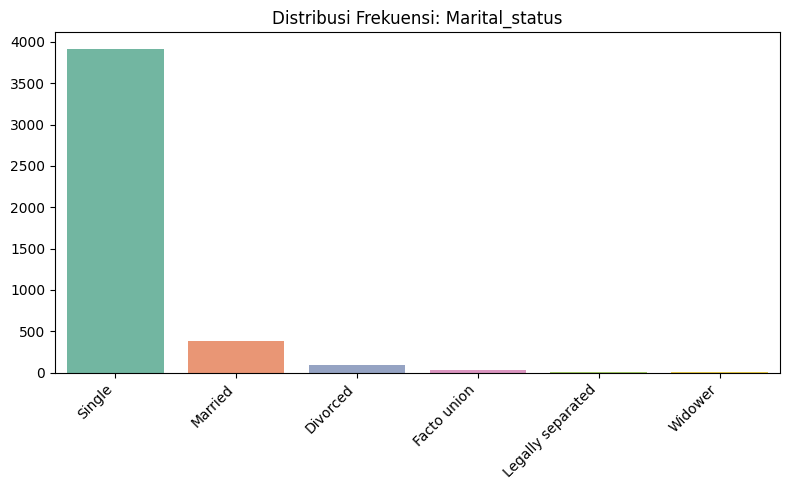

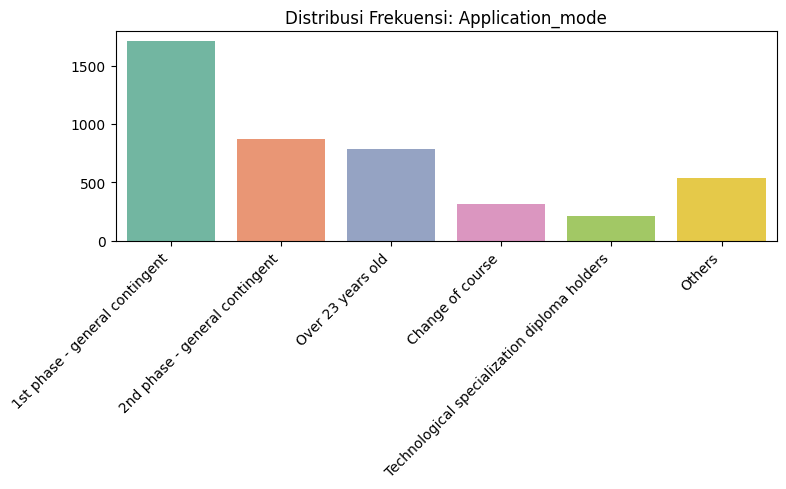

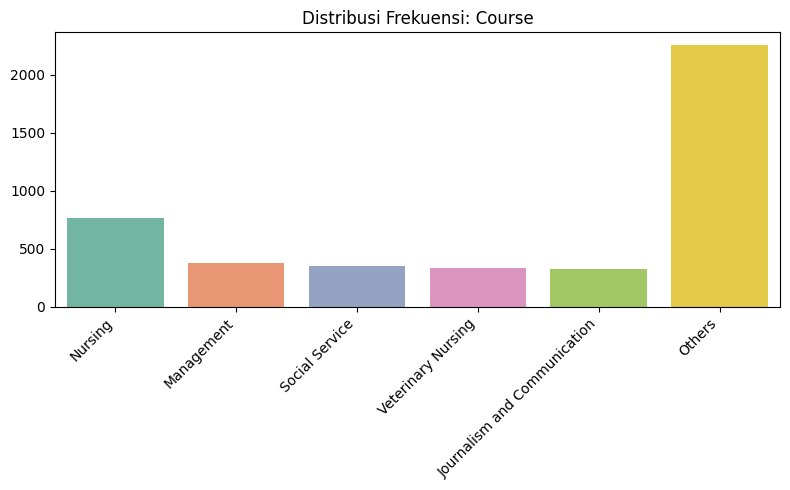

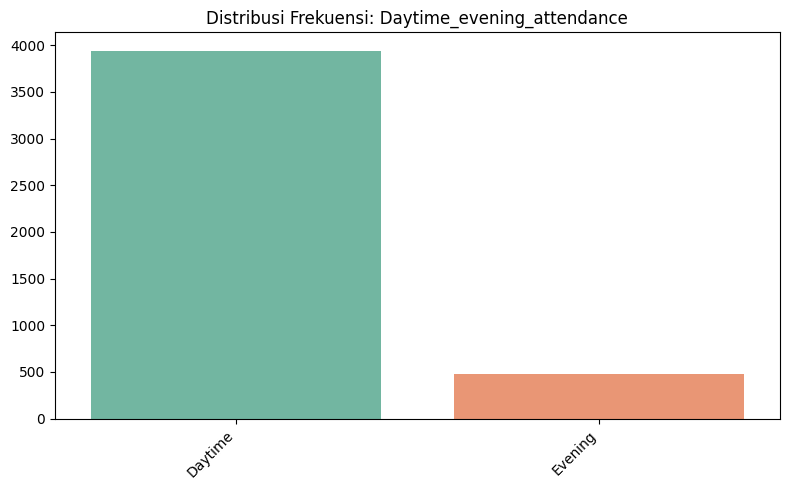

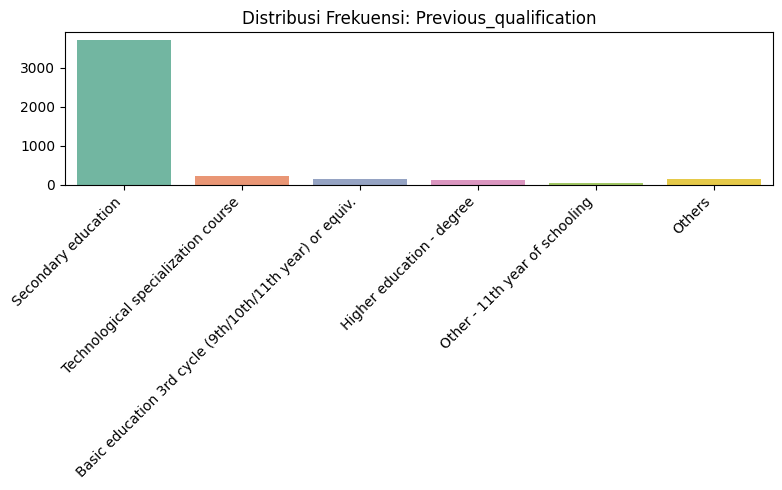

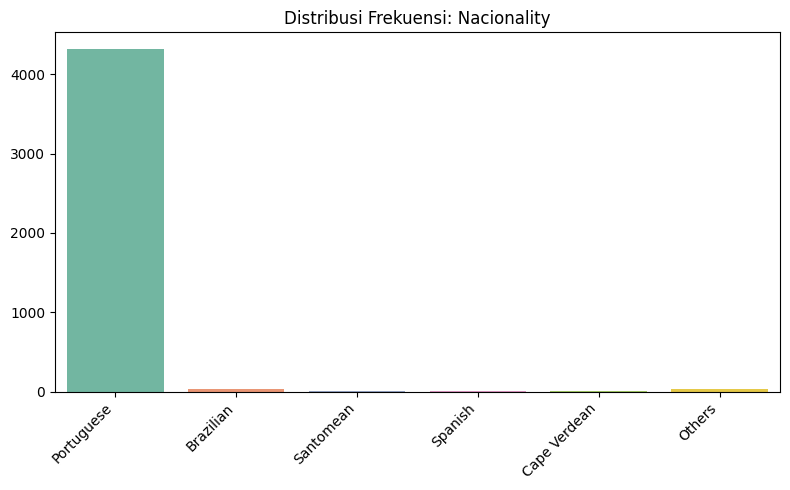

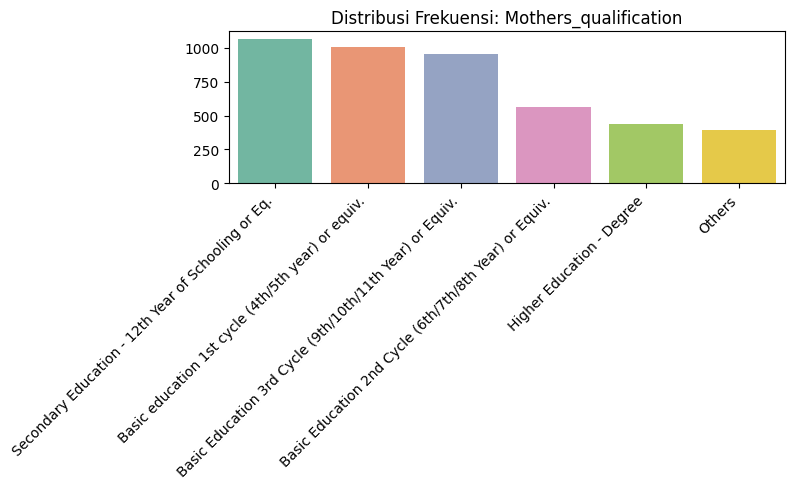

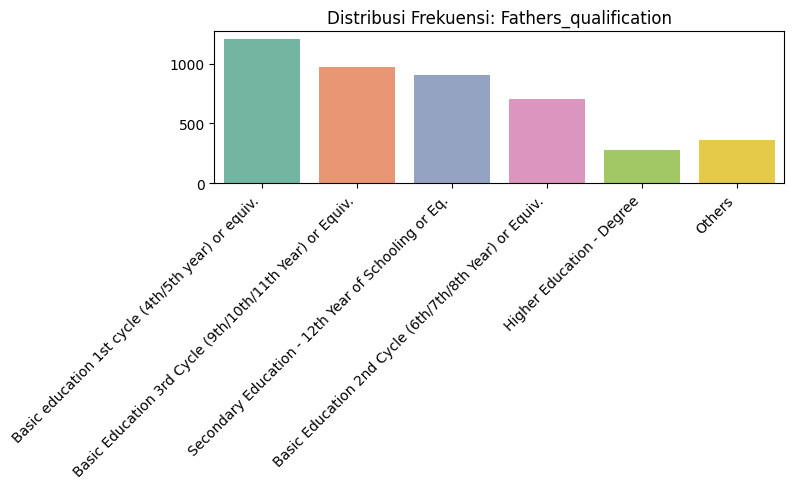

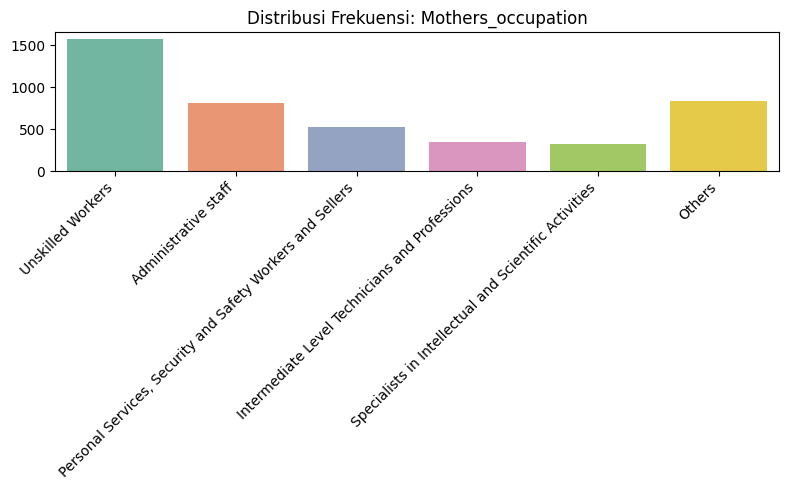

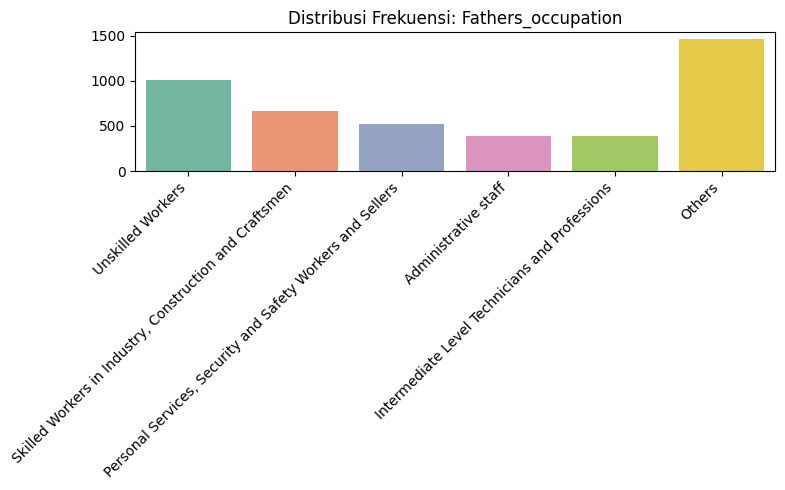

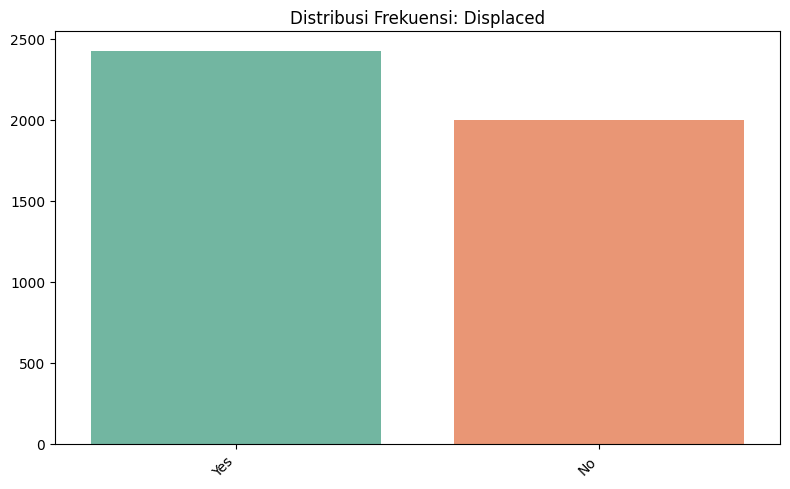

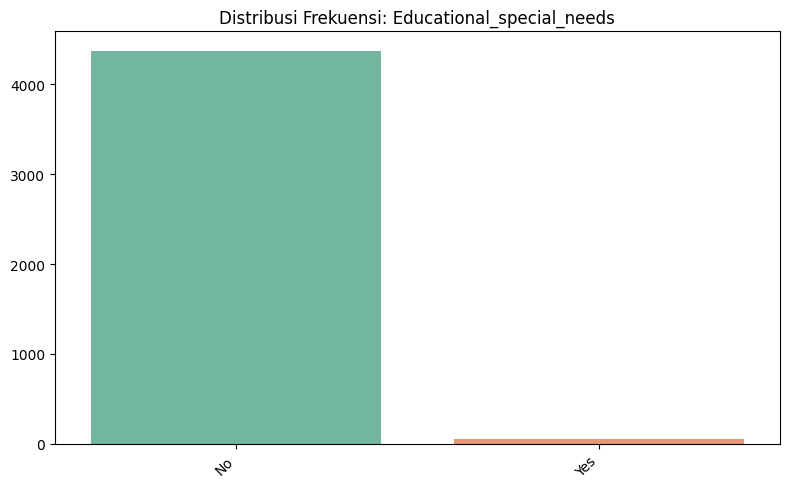

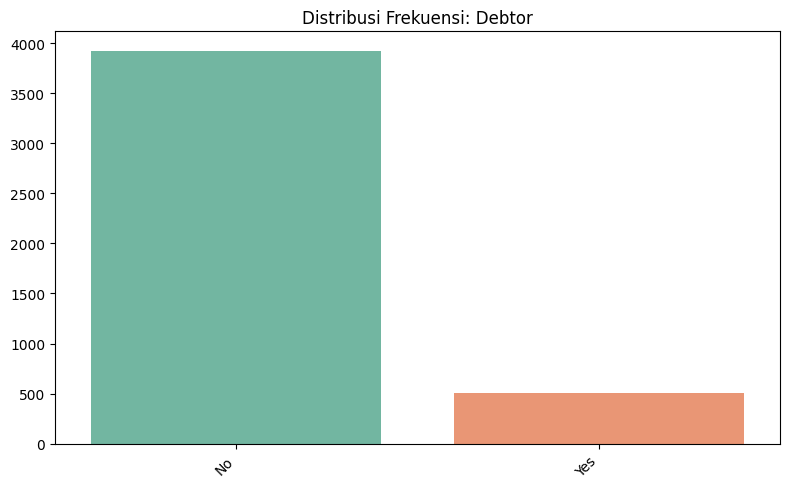

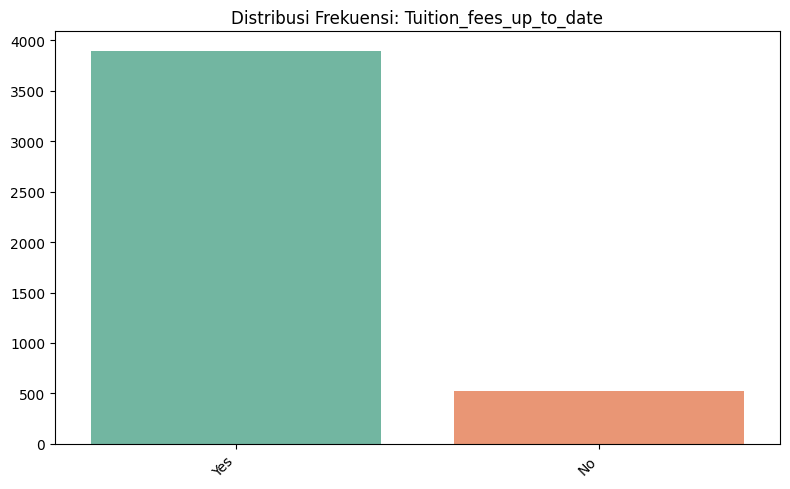

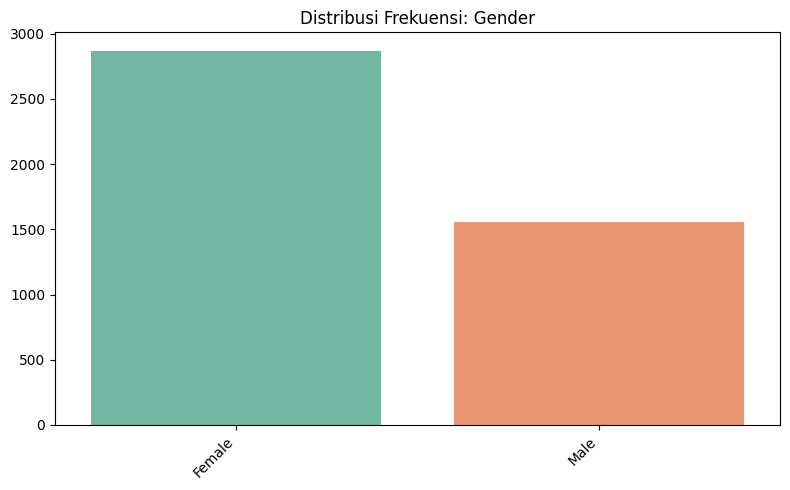

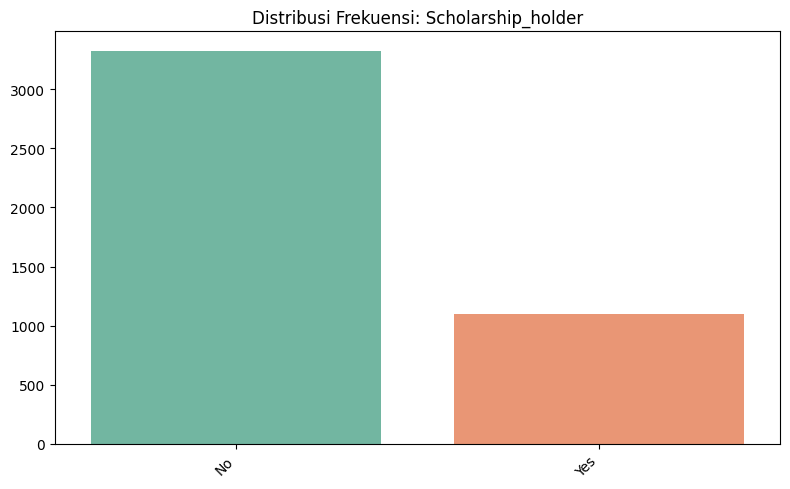

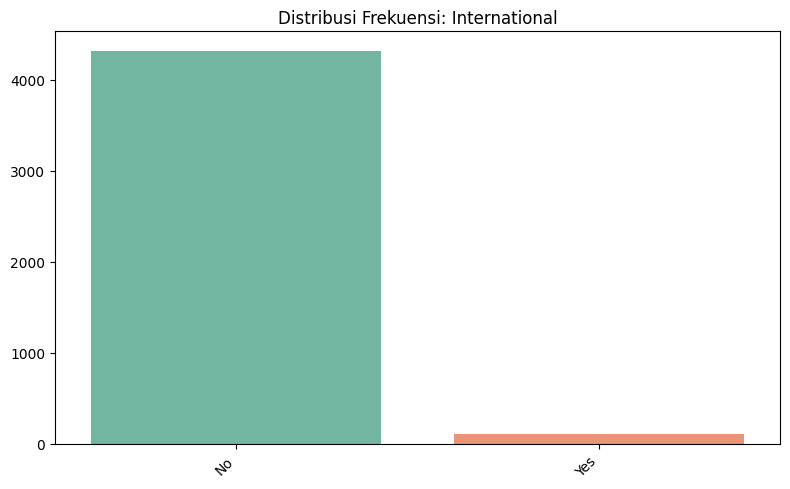

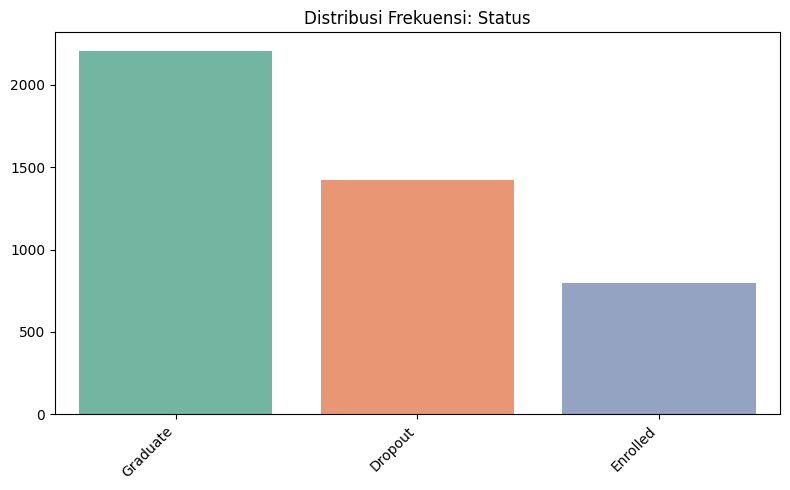

In [11]:
# --- Visualization Tiap Fitur ---
plot_categorical_columns(df, categorical_columns, custom_labels=custom_labels)

#### **Temuan dari Visualisasi Fitur Kategorikal**

Berdasarkan hasil visualisasi data kategorikal, berikut adalah beberapa temuan menarik yang dapat membantu dalam menyelesaikan permasalahan prediksi dropout di Jaya Jaya Institut:

- Mayoritas mahasiswa berstatus **Graduate**, disusul oleh **Dropout** dan **Enrolled**.Hal ini menunjukkan bahwa sebagian besar mahasiswa berhasil menyelesaikan studi, namun angka *dropout* masih signifikan.

- Sebagian besar mahasiswa mengikuti perkuliahan pada **siang hari** (*daytime*), sementara yang mengikuti perkuliahan **malam hari** (*evening*) relatif sedikit.Ini dapat menjadi indikator terkait fleksibilitas waktu kuliah dalam memengaruhi *dropout*.

- Sebagian besar mahasiswa memiliki kualifikasi sebelumnya di tingkat **Secondary Education** dan **Technological Specialization Course**. Kualifikasi sebelumnya yang rendah bisa menjadi faktor risiko *dropout*.

- Mayoritas mahasiswa berasal dari **Portugal**, dengan minoritas dari negara lain. Mahasiswa internasional relatif sedikit, yang mungkin membutuhkan pendekatan berbeda dalam dukungan akademis.

- Hanya sedikit siswa yang membutuhkan pendidikan khusus (**Educational Special Needs**), yang berarti mayoritas siswa dapat mengikuti kegiatan belajar mengajar tanpa hambatan signifikan.

- Tingkat pendidikan orang tua sebagian besar berada pada **Basic Education 1st Cycle** dan **Basic Education 3rd Cycle**, baik untuk ibu maupun ayah. Pendidikan orang tua yang lebih rendah dapat berdampak pada dukungan akademis dan motivasi mahasiswa.

- Kebanyakan mahasiswa **tidak memiliki utang pendidikan** (*debtor*) dan **biaya pendidikan up to date**, namun sekitar **20%** adalah **scholarship holder**. Ini mengindikasikan adanya bantuan finansial yang cukup untuk sebagian mahasiswa, namun masih banyak yang membutuhkan dukungan tambahan.

- Mayoritas mahasiswa **tidak memiliki kebutuhan khusus** (*educational_special_needs*) dan tidak dalam kondisi **displaced**.Namun, mahasiswa yang memiliki kebutuhan khusus mungkin membutuhkan perhatian lebih dalam proses belajar.


Secara keseluruhan, visualisasi data ini membantu dalam memahami karakteristik utama siswa, baik dari sisi akademik, latar belakang keluarga, maupun aspek demografis lainnya. Informasi ini dapat menjadi dasar pertimbangan yang kuat dalam proses analisis dan pemodelan selanjutnya.


### Visualisasi Data Numerik

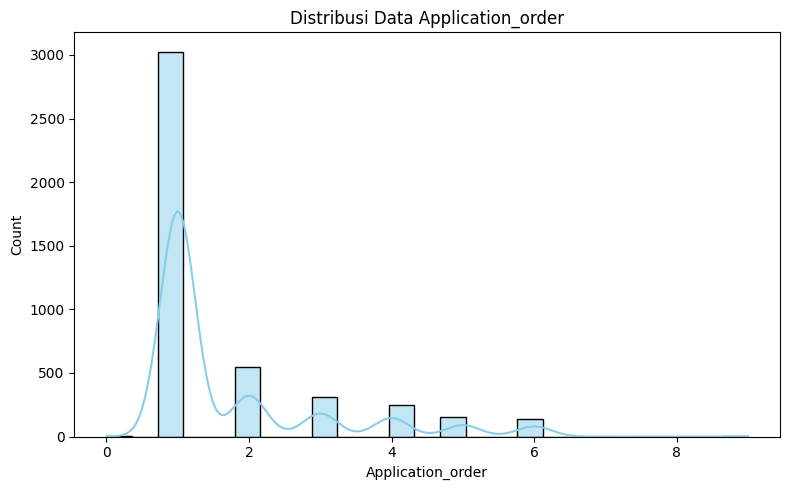

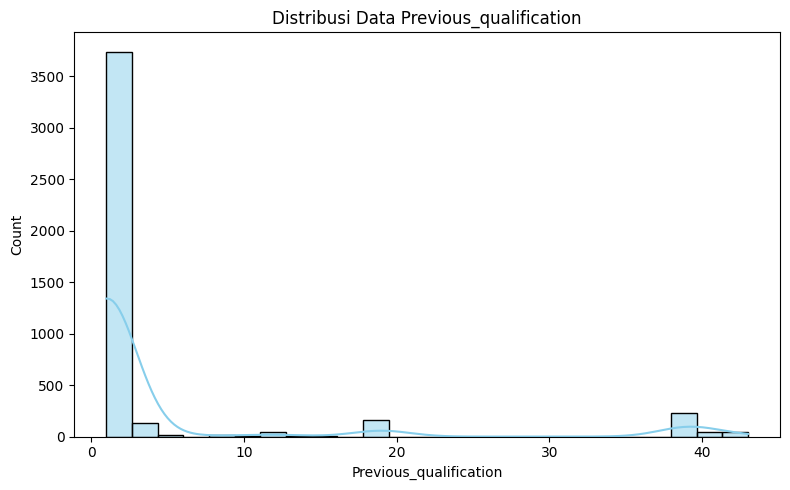

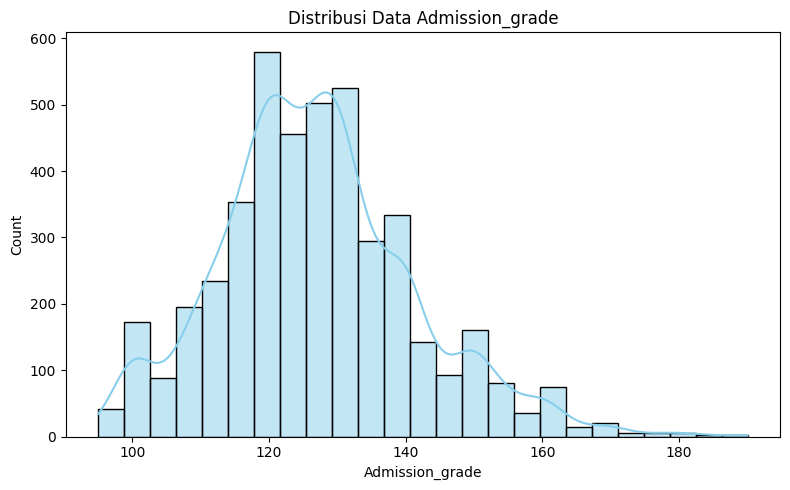

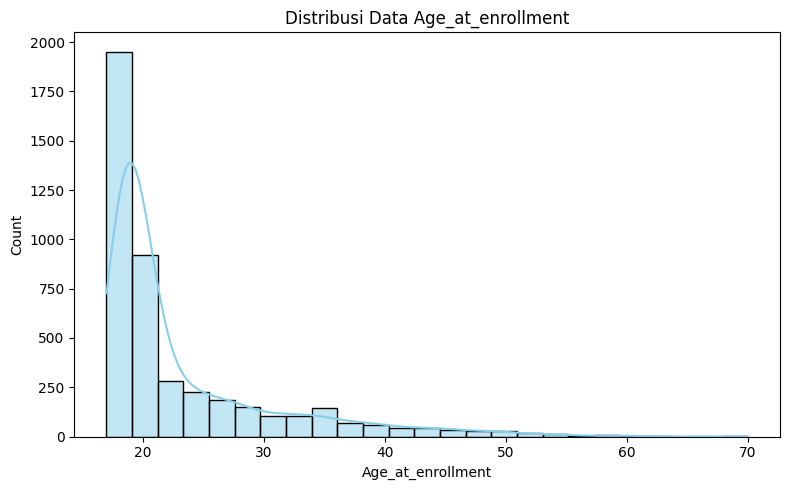

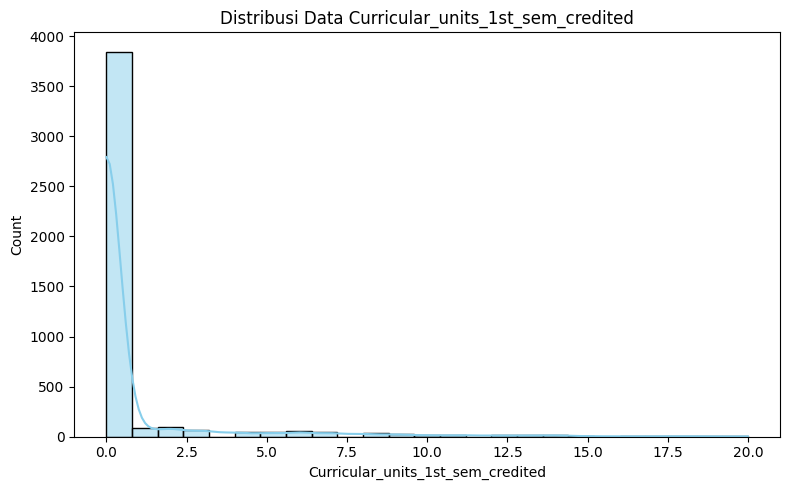

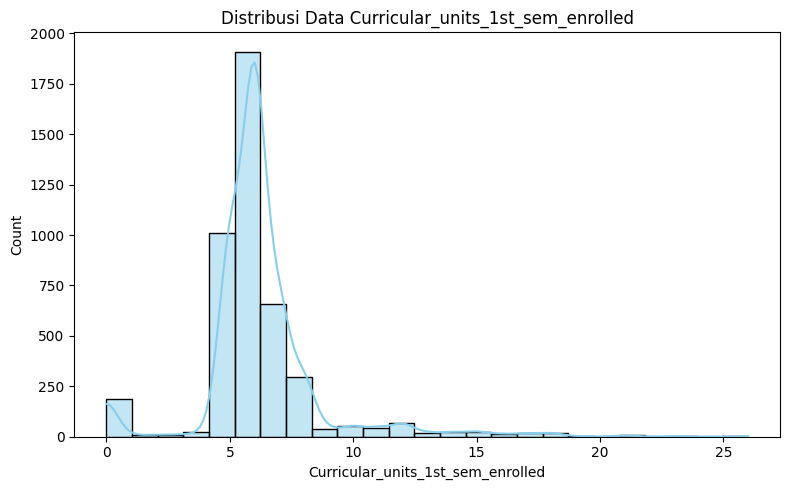

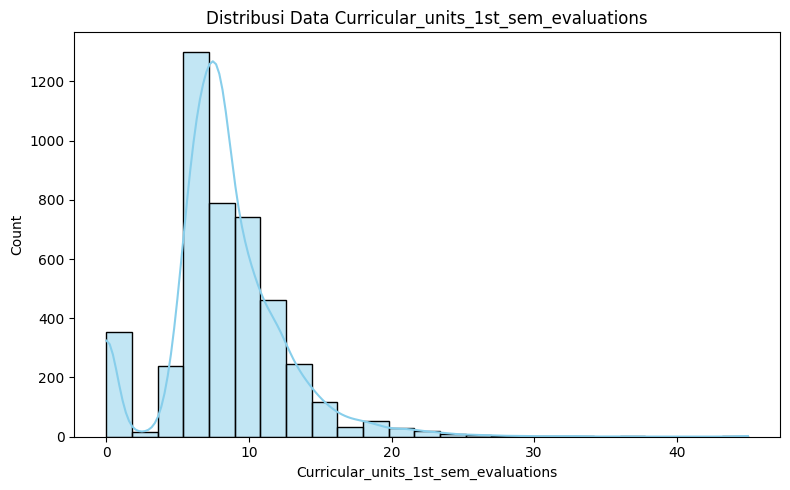

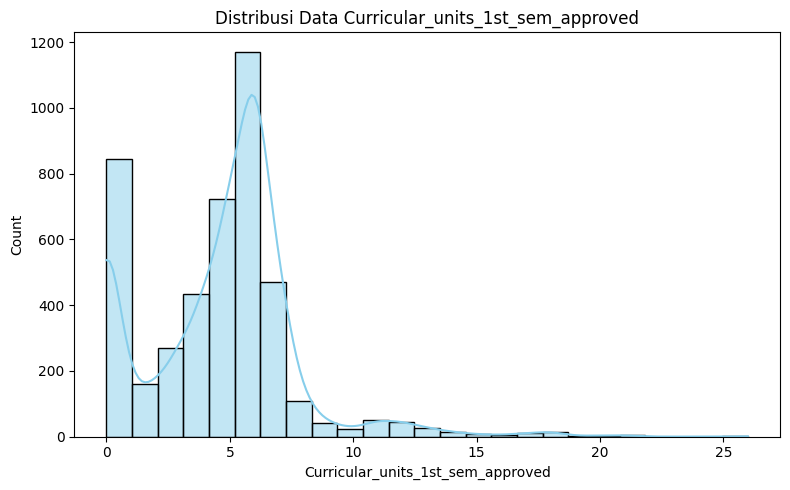

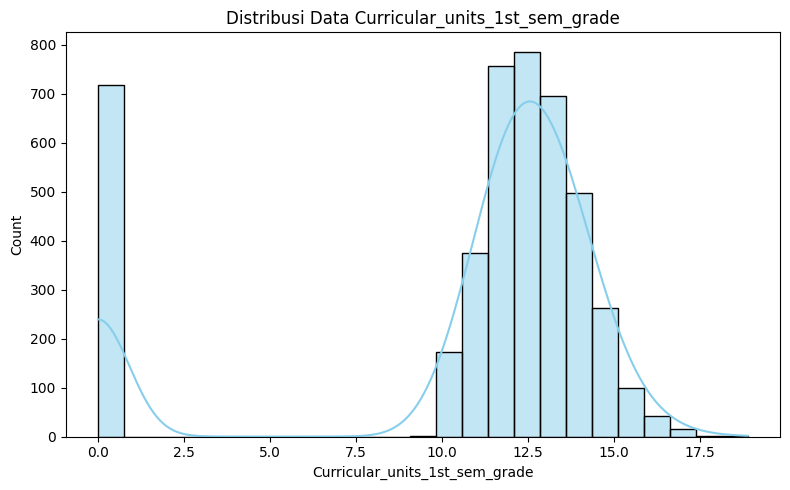

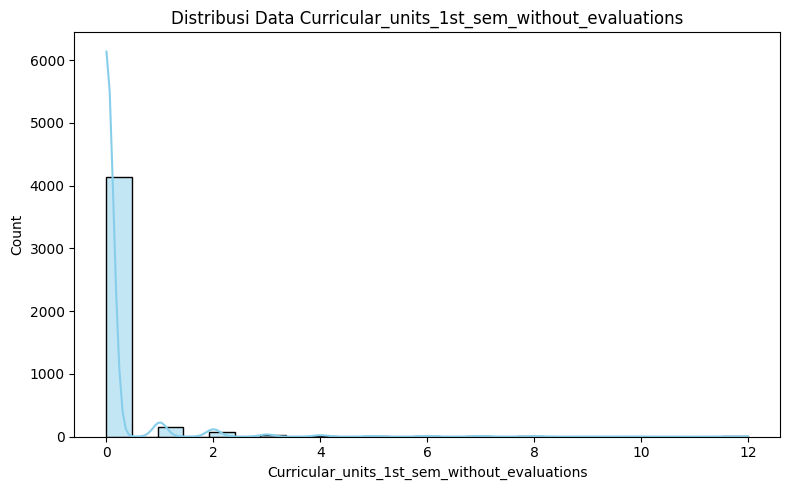

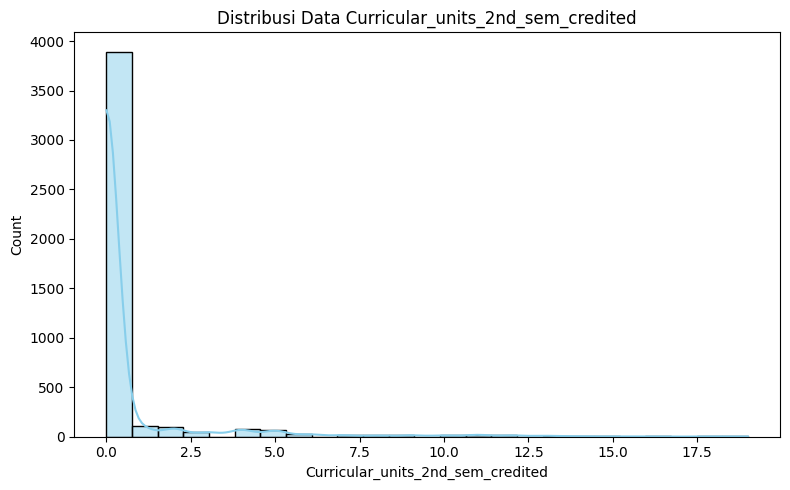

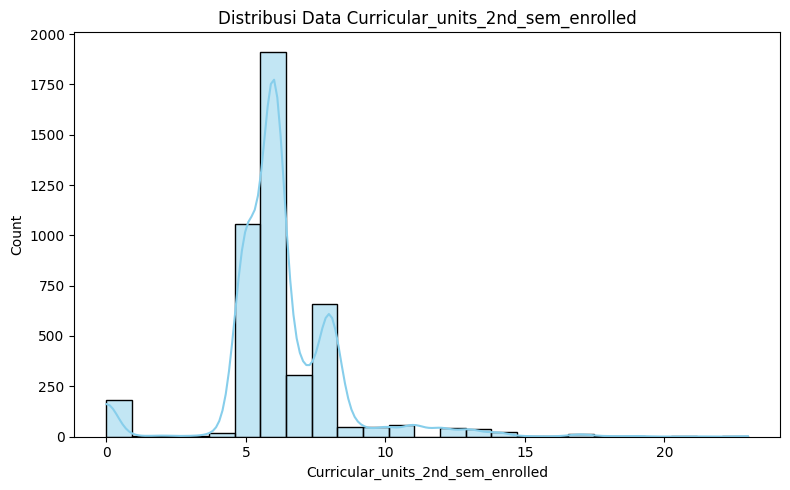

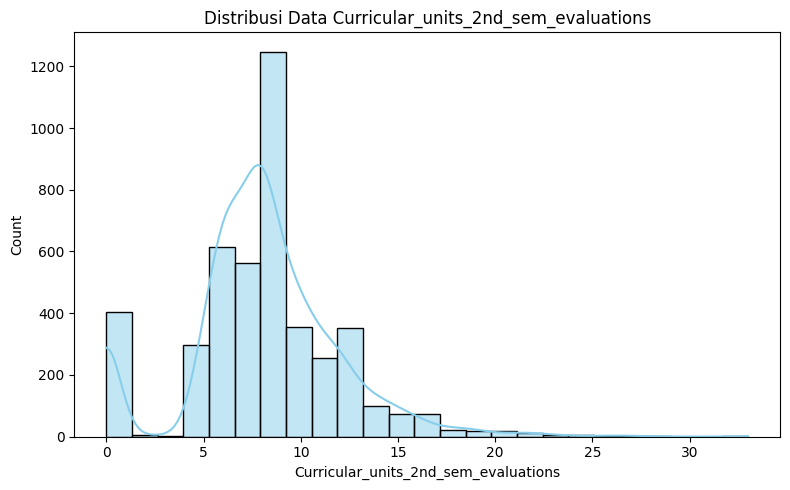

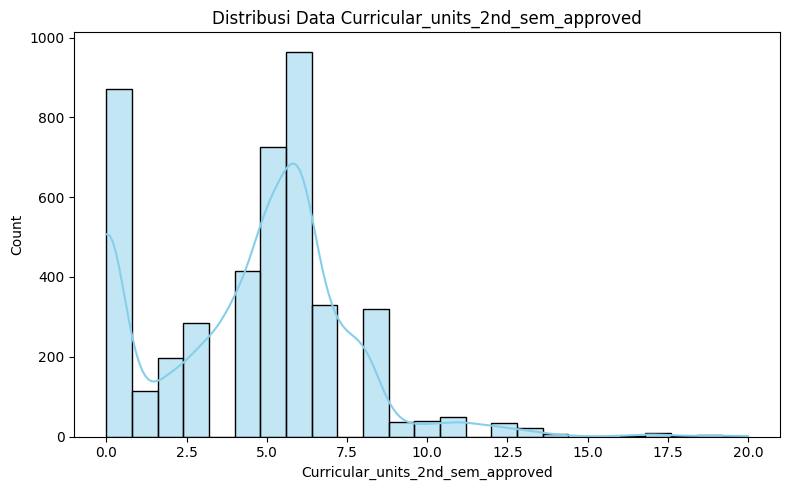

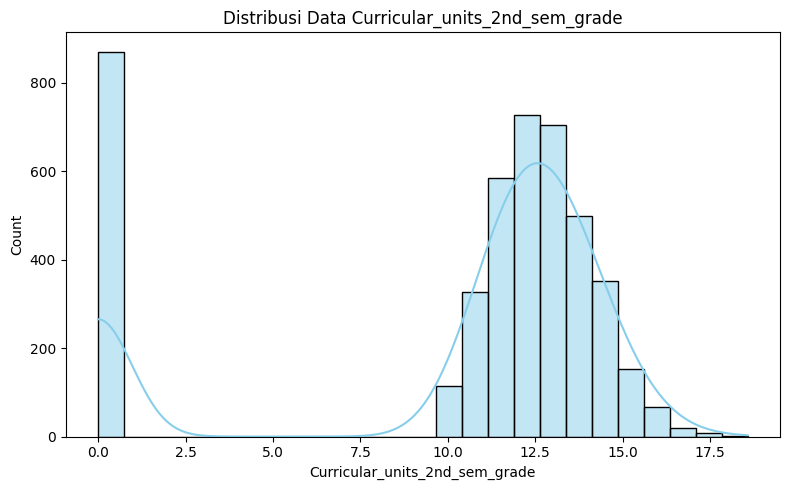

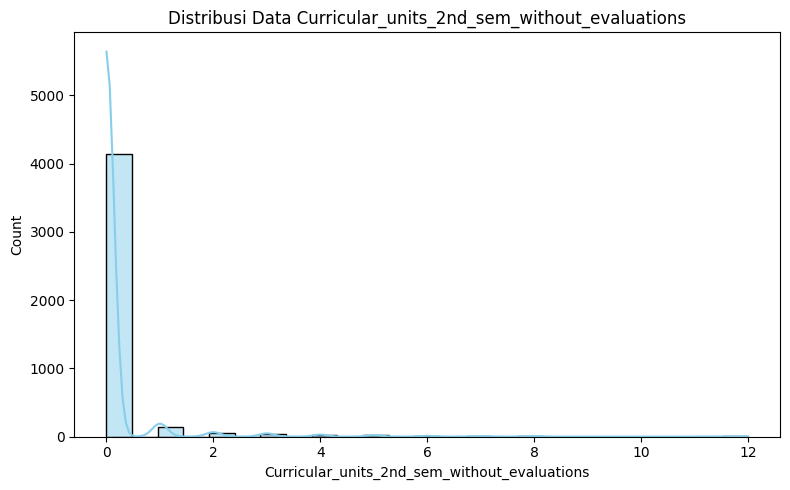

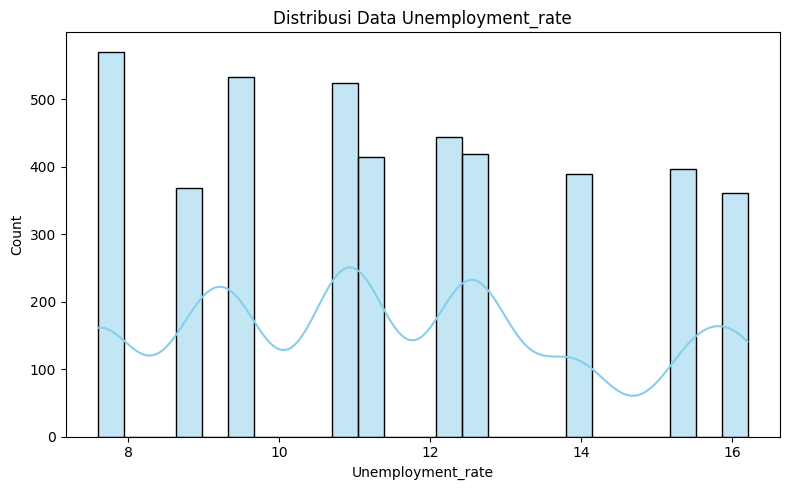

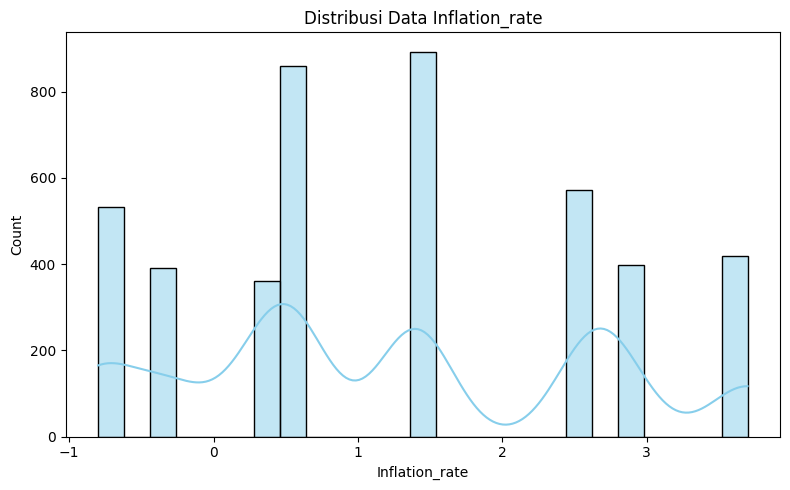

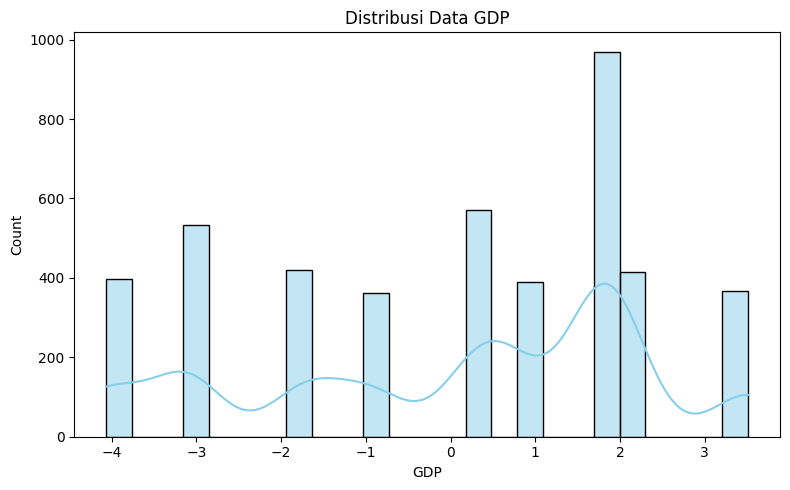

In [12]:
plot_numerical_distributions(df, numerical_columns)

### Temuan dari Visualisasi Fitur Numerik

Hasil eksplorasi terhadap fitur numerik dalam data menunjukkan beberapa pola yang relevan:

- Nilai pendaftaran mahasiswa relatif baik, dan mayoritas berusia muda saat mendaftar.
- Di semester pertama, mahasiswa cenderung mengambil beban studi yang standar, dan sebagian besar berhasil menyelesaikan studi tersebut dengan performa baik.
- Korelasi positif antara `Income` dan `SpendingScore` mengindikasikan bahwa tingkat pendapatan seseorang berpotensi memengaruhi pola pengeluaran mereka.
- Sistem evaluasi cenderung ketat dengan sedikit sekali mata kuliah yang tidak dievaluasi.
- Distribusi usia dan beban studi menunjukkan konsentrasi pada kelompok umur produktif dengan jumlah kredit yang diambil dalam batas normal, mengindikasikan perencanaan studi yang terstruktur dengan baik.
- Meskipun mayoritas mahasiswa menyelesaikan studi di semester pertama dengan baik, terdapat indikasi outlier pada beberapa mahasiswa yang mengambil lebih banyak kredit namun tidak menunjukkan hasil optimal, yang mungkin dapat dianalisis lebih dalam terkait faktor-faktor yang memengaruhinya.

Temuan ini membuka peluang untuk analisis lebih dalam terhadap hubungan antara faktor demografis seperti usia dan pendapatan terhadap keberhasilan akademik, serta bagaimana beban studi dan sistem evaluasi memengaruhi tingkat dropout mahasiswa. Selain itu, pemahaman lebih dalam mengenai outlier dapat membantu mengidentifikasi mahasiswa yang membutuhkan intervensi dini.

### Visualisasi Korelasi Antar Fitur

In [13]:
# Filter hanya untuk Dropout dan Graduate
data = df[df['Status'].isin(['Dropout', 'Graduate'])]

# Binarisasi target: Dropout → 0, Graduate → 1
data['Status'] = data['Status'].map({'Dropout': 0, 'Graduate': 1})

# Cek distribusi setelah filter
print(data['Status'].value_counts())

Status
1    2209
0    1421
Name: count, dtype: int64


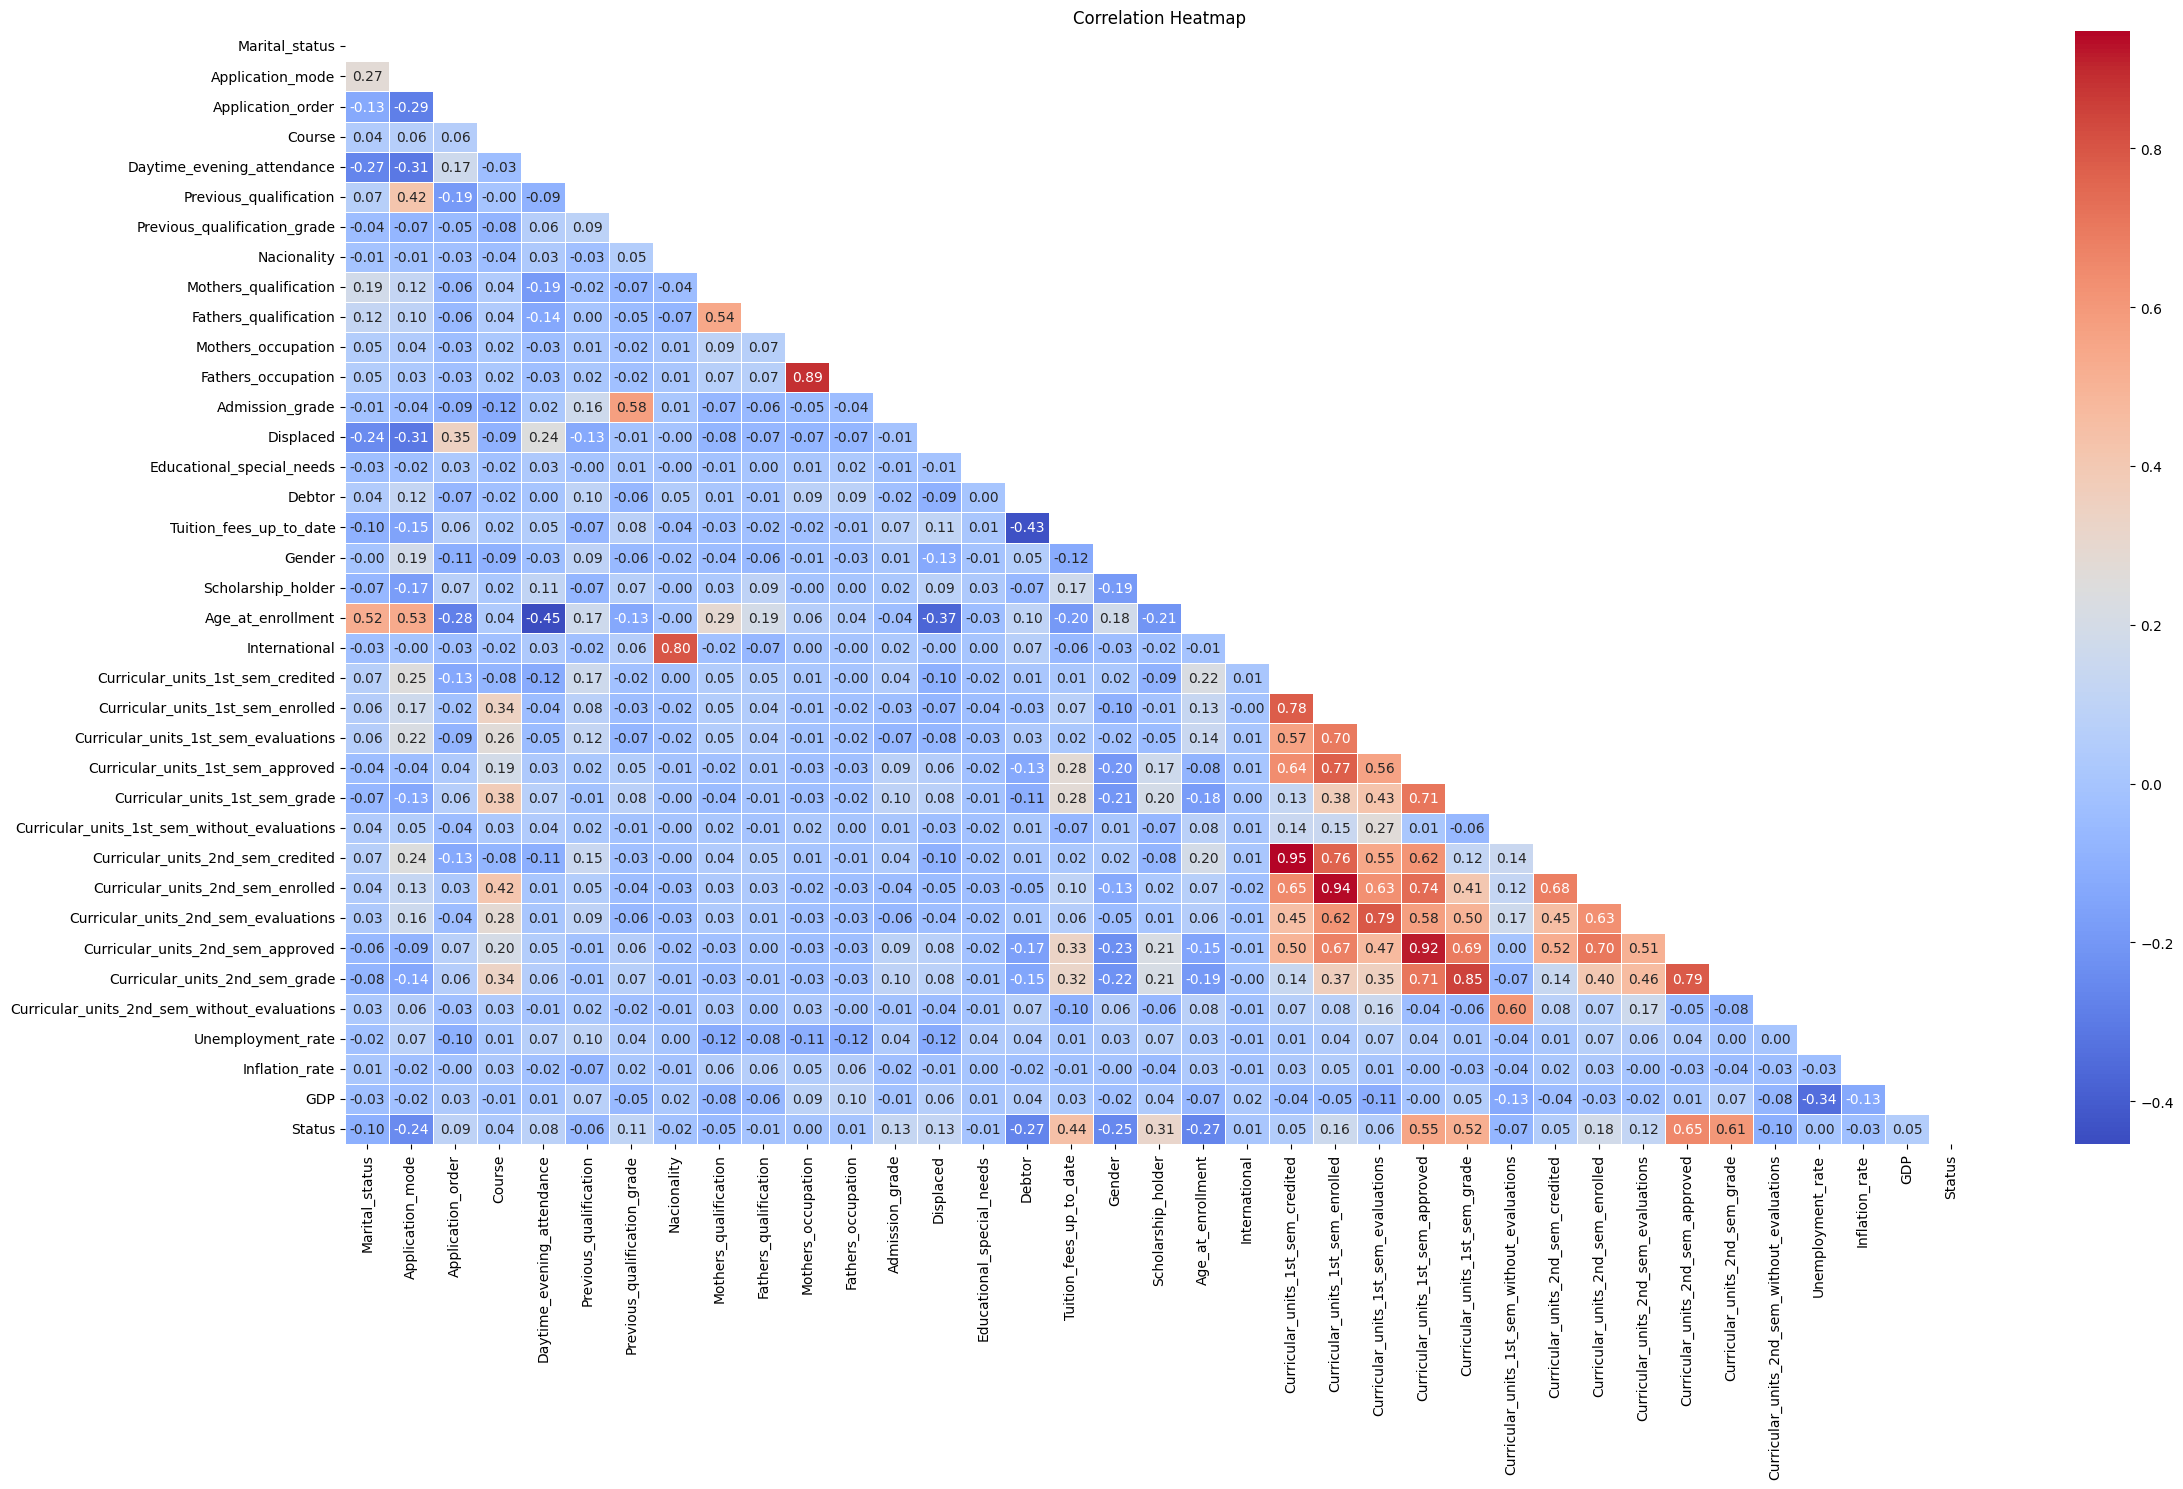

In [14]:
plot_correlation_heatmap(data)

### Insight dari Heatmap dan Korelasi Pearson

Berdasarkan visualisasi heatmap, tampak bahwa sebagian besar fitur dalam dataset **Students' Performance** memiliki korelasi yang bervariasi satu sama lain, termasuk terhadap variabel target (`Status`). Variabel `Status` yang kita fokuskan hanya pada dua kelas utama, yaitu **Dropout** dan **Graduate**, tampak memiliki hubungan yang relevan dengan beberapa fitur.

Untuk menggali lebih dalam, digunakan pendekatan **koefisien korelasi Pearson** — sebuah metode statistik yang mengukur kekuatan dan arah hubungan linier antara dua variabel. Nilainya berada dalam rentang **-1 hingga 1**, di mana:
- Nilai mendekati **1** menunjukkan hubungan linier positif yang kuat,
- Nilai mendekati **-1** menunjukkan hubungan linier negatif yang kuat,
- Nilai mendekati **0** menunjukkan tidak adanya hubungan linier.

beberapa fitur juga menunjukkan korelasi kuat antar sesama, seperti:
- **`Curricular_units_1st_sem_approved`** memiliki korelasi yang tinggi dengan **`Curricular_units_1st_sem_grade`**, menunjukkan bahwa semakin tinggi nilai di semester pertama, semakin banyak unit yang disetujui.
- **`Curricular_units_2nd_sem_approved`** juga memiliki korelasi tinggi dengan **`Curricular_units_2nd_sem_grade`**, yang mengindikasikan pola yang sama di semester kedua.
- Terdapat hubungan yang cukup signifikan antara **`Curricular_units_1st_sem_approved`** dan **`Curricular_units_2nd_sem_approved`**, yang mengindikasikan bahwa siswa yang berprestasi baik di semester pertama cenderung juga berprestasi di semester kedua.
- **`Previous_qualification_grade`** memiliki korelasi positif yang moderat dengan **`Previous_qualification`**, yang masuk akal karena semakin baik kualifikasi sebelumnya, semakin baik juga nilai yang diraih.

Temuan-temuan ini memberikan dasar awal dalam proses feature selection dan engineering untuk membangun model prediktif yang lebih akurat dalam mengidentifikasi risiko Dropout.


### Visualisasi Korelasi Target vs Fitur

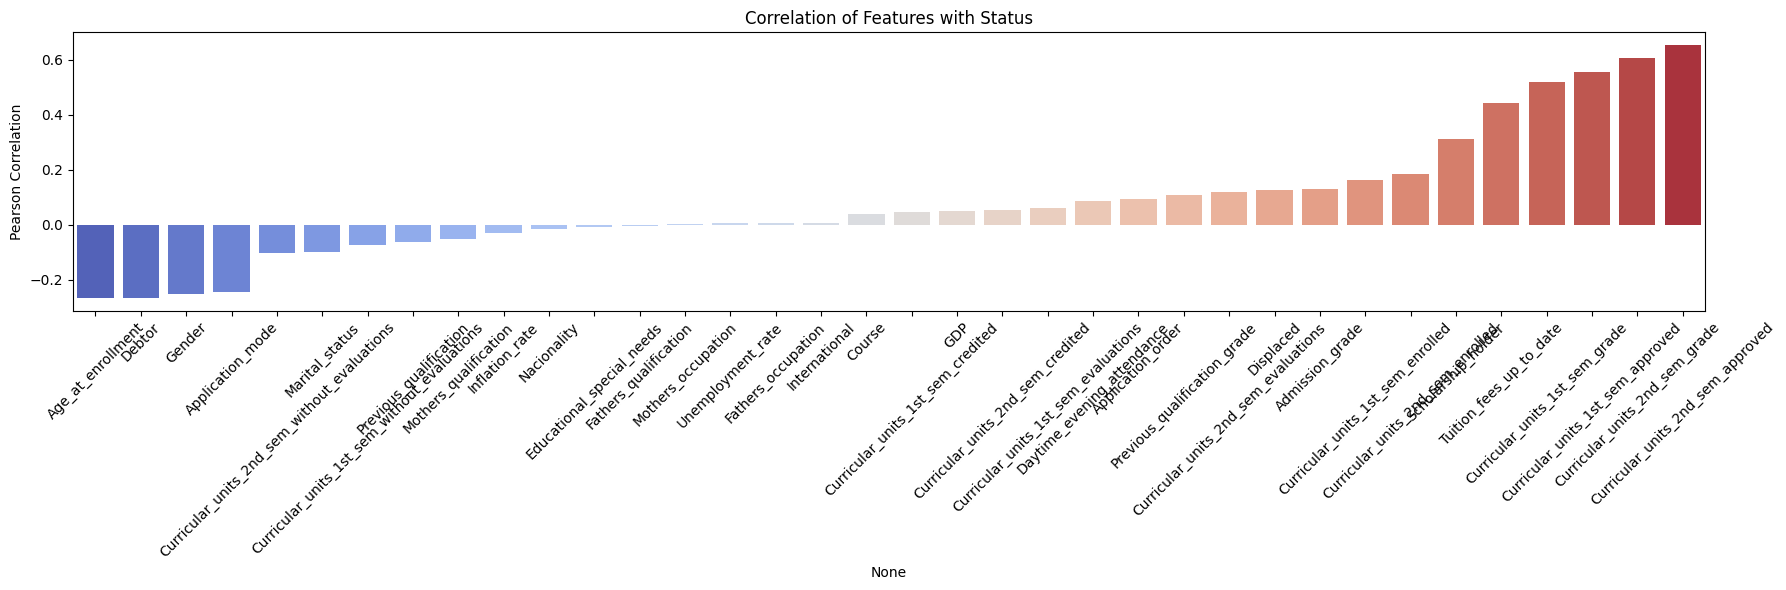

In [15]:
plot_feature_correlations(data, target='Status')

## Insight dari Eksplorasi Korelasi Fitur dengan Status

- Fitur yang paling berkorelasi negatif dengan `Status` adalah **`Age_at_enrollment`** dengan nilai korelasi -0.27, menunjukkan bahwa semakin tua usia siswa saat mendaftar, semakin besar kemungkinan untuk dropout.
- **`Scholarship_holder`** memiliki korelasi positif sebesar 0.31, yang berarti siswa yang menerima beasiswa cenderung lebih besar kemungkinannya untuk Graduate.
- International tidak menunjukkan korelasi signifikan terhadap status (0.01), mengindikasikan bahwa mahasiswa internasional tidak memiliki keterkaitan mengenai lulus tidak nya mahasiswa.
- Beberapa fitur terkait unit akademik (seperti **`Curricular_units_1st_sem_grade`** dan **`Curricular_units_2nd_sem_grade`**) juga menunjukkan korelasi positif terhadap `Status`, yang artinya semakin banyak unit yang lulus, semakin besar kemungkinan siswa untuk graduate.
-**`Tuition_fees_up_to_date`** juga menunjukkan korelasi positif sebesar 0.44, mengindikasikan bahwa siswa yang membayar biaya kuliah tepat waktu memiliki kemungkinan yang jauh lebih tinggi untuk Graduate.

## Kesimpulan
Hasil analisis ini menunjukkan bahwa beberapa fitur akademik, terutama jumlah mata kuliah yang lulus di semester awal, pembayaran biaya kuliah tepat waktu, beasiswa, dan usia saat mendaftar memiliki korelasi yang signifikan terhadap status kelulusan atau dropout siswa. Fitur-fitur ini dapat menjadi fokus utama dalam proses feature selection pada tahap modeling, terutama untuk meningkatkan prediksi terhadap siswa yang berpotensi dropout. Informasi mengenai kualifikasi sebelumnya dan tingkat pendidikan orang tua juga menunjukkan korelasi positif meskipun lemah, sehingga mungkin perlu dipertimbangkan dalam model. Sebaliknya, status internasional dan kondisi ekonomi makro menunjukkan korelasi yang sangat lemah dan mungkin tidak menjadi prediktor yang kuat untuk status siswa.

### Visualisasi Proporsi Target

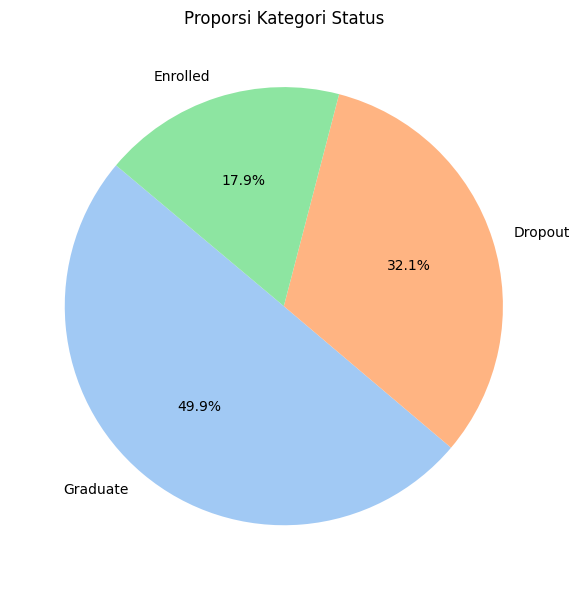

In [16]:
# Visualisasi Proporsi Attrition
plot_pie_distribution(df, 'Status')

#### Observasi Distribusi Target

Dalam dataset ini, sebagian besar mahasiswa lulus (Graduate), dengan sekitar 55% dari total populasi, sementara sekitar 31% mahasiswa mengalami dropout. Kategori Enrolled relatif lebih kecil, hanya sekitar 14%.

Distribusi ini menunjukkan bahwa meskipun sebagian besar mahasiswa berhasil menyelesaikan studi mereka, jumlah mahasiswa yang dropout tetap cukup signifikan, mencapai hampir sepertiga dari total populasi.

Hal ini menjadi perhatian penting untuk analisis lebih lanjut, karena fokus utama dari model ini adalah memprediksi potensi dropout siswa. Dengan pemahaman distribusi ini, langkah selanjutnya dalam analisis dan pemodelan dapat difokuskan pada identifikasi faktor-faktor yang mempengaruhi risiko dropout mahasiswa, serta mencari cara untuk mengurangi angka dropout melalui intervensi yang lebih tepat.

## Kesimpulan

Berdasarkan eksplorasi data yang telah dilakukan terhadap dataset mahasiswa Jaya Jaya Institut, terdapat beberapa faktor penting yang memiliki hubungan signifikan dengan status kelulusan atau dropout mahasiswa, yaitu:

- **Faktor usia dan waktu pendaftaran**: Usia saat mendaftar (`Age_at_enrollment`) menunjukkan korelasi negatif dengan status mahasiswa, di mana semakin tua usia mahasiswa saat mendaftar, semakin besar kemungkinan untuk **dropout**.
- **Faktor akademik**: Jumlah unit kurikuler yang lulus pada semester pertama dan kedua (`Curricular_units_1st_sem_grade`, `Curricular_units_2nd_sem_grade`) menunjukkan korelasi positif dengan status mahasiswa, yang berarti semakin banyak mata kuliah yang berhasil diselesaikan, semakin besar kemungkinan mahasiswa untuk **graduate**.
- **Faktor keuangan**: Pembayaran biaya kuliah tepat waktu (`Tuition_fees_up_to_date`) memiliki korelasi positif dengan kelulusan, di mana mahasiswa yang membayar biaya kuliah tepat waktu cenderung lebih besar kemungkinannya untuk **graduate**.
- **Faktor beasiswa**: Mahasiswa yang menerima **beasiswa** memiliki korelasi positif dengan **graduation**, yang menunjukkan bahwa mahasiswa yang mendapat beasiswa cenderung lebih mungkin untuk lulus dibandingkan dengan mereka yang tidak mendapat beasiswa.
- **Faktor internasional**: Status internasional (`International`) tidak menunjukkan korelasi yang signifikan dengan status kelulusan atau dropout, sehingga status internasional tampaknya tidak menjadi faktor utama dalam prediksi kelulusan atau dropout.

Temuan ini dapat digunakan untuk mengidentifikasi faktor-faktor yang dapat digunakan untuk memprediksi mahasiswa yang berpotensi dropout. Beberapa rekomendasi untuk mendukung mahasiswa agar tetap lulus antara lain:
- Memberikan dukungan khusus bagi mahasiswa dengan usia lebih tua saat mendaftar untuk meningkatkan retensi mereka.
- Menyediakan bantuan finansial atau program beasiswa bagi mahasiswa yang mengalami kesulitan membayar biaya kuliah.
- Meningkatkan pemantauan terhadap mahasiswa yang memiliki performa akademik rendah di semester awal untuk memberikan intervensi yang lebih cepat.

Langkah selanjutnya adalah membangun model prediksi yang dapat memanfaatkan faktor-faktor ini untuk memprediksi mahasiswa yang berisiko dropout, sehingga institusi dapat memberikan intervensi yang tepat waktu.


## Data Preparation / Preprocessing

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


#  Pisahkan fitur kategorikal dan numerik
categorical_cols = data.select_dtypes(include='object').columns.tolist()
numerical_cols = data.select_dtypes(include=np.number).drop(columns='Status').columns.tolist()

#  Label encoding untuk semua fitur kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Simpan encoder jika nanti mau inverse_transform atau inference

# Standardisasi fitur numerik
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Pisahkan fitur dan target
X = data.drop('Status', axis=1)
y = data['Status']

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung korelasi antar fitur numerik
corr_matrix = data[numerical_cols].corr()

# Cari fitur dengan korelasi tinggi
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr >= 0.85]
high_corr = high_corr[high_corr < 1]
print("Fitur dengan Korelasi Tinggi:\n", high_corr)

Fitur dengan Korelasi Tinggi:
 Curricular_units_2nd_sem_credited  Curricular_units_1st_sem_credited    0.947093
Curricular_units_1st_sem_credited  Curricular_units_2nd_sem_credited    0.947093
Curricular_units_1st_sem_enrolled  Curricular_units_2nd_sem_enrolled    0.941286
Curricular_units_2nd_sem_enrolled  Curricular_units_1st_sem_enrolled    0.941286
Curricular_units_1st_sem_approved  Curricular_units_2nd_sem_approved    0.916334
Curricular_units_2nd_sem_approved  Curricular_units_1st_sem_approved    0.916334
Mothers_occupation                 Fathers_occupation                   0.886568
Fathers_occupation                 Mothers_occupation                   0.886568
dtype: float64


In [19]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Melatih model RandomForest untuk melihat feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Ambil skor pentingnya fitur
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Tampilkan 15 fitur paling penting
print("Fitur Paling Penting:")
print(feature_importances.head(15))


Fitur Paling Penting:
                                 Feature  Importance
30     Curricular_units_2nd_sem_approved    0.209400
31        Curricular_units_2nd_sem_grade    0.143935
24     Curricular_units_1st_sem_approved    0.119946
25        Curricular_units_1st_sem_grade    0.061413
16               Tuition_fees_up_to_date    0.057985
19                     Age_at_enrollment    0.033986
12                       Admission_grade    0.028708
23  Curricular_units_1st_sem_evaluations    0.028450
29  Curricular_units_2nd_sem_evaluations    0.028228
3                                 Course    0.024310
6           Previous_qualification_grade    0.024168
18                    Scholarship_holder    0.022566
28     Curricular_units_2nd_sem_enrolled    0.021944
11                    Fathers_occupation    0.015627
22     Curricular_units_1st_sem_enrolled    0.015393


In [20]:
# Fitur yang akan digunakan
selected_features = [
    'Course',
    'Previous_qualification_grade',
    'Admission_grade',
    'Tuition_fees_up_to_date',
    'Age_at_enrollment',
    'Scholarship_holder',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Fathers_occupation'
]

# Update X
X = X[selected_features]

# Cek hasil akhir
print("Shape of X after feature selection:", X.shape)


Shape of X after feature selection: (3630, 12)


In [21]:
# Split data ke training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Cek hasil akhir
print("X_train shape:", X_train.shape)
print("y_train value counts:")
print(y_train.value_counts())

X_train shape: (2904, 12)
y_train value counts:
Status
1    1767
0    1137
Name: count, dtype: int64


## Modelling

In [22]:
# Inisialisasi dan training model
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [23]:
trained_models = {}
y_preds = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    trained_models[name] = model
    y_preds[name] = y_pred

## Evaluation

In [24]:
for name, y_pred in y_preds.items():
    print(f"=== {name} ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("="*50)

=== Logistic Regression ===
Confusion Matrix:
[[234  50]
 [ 22 420]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.87       284
           1       0.89      0.95      0.92       442

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726

=== Random Forest ===
Confusion Matrix:
[[232  52]
 [ 19 423]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       284
           1       0.89      0.96      0.92       442

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726

=== XGBoost ===
Confusion Matrix:
[[233  51]
 [ 22 420]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82

## Evaluasi Model Machine Learning untuk Prediksi Status Siswa: Dropout vs Graduate

### Tujuan Model
Model prediksi ini dibangun untuk memprediksi kemungkinan seorang siswa akan keluar (dropout) atau lulus (graduate), guna membantu pihak pendidikan dalam mengambil tindakan preventif untuk siswa berisiko dropout.

---

### Model yang Digunakan
- Logistic Regression
- Random Forest
- XGBoost Classifier

---

### Hasil Evaluasi

#### 1. Logistic Regression
- **Accuracy**: 90%
- **Precision (Dropout)**: 0.91
- **Recall (Dropout)**: 0.82
- **F1-score (Dropout)**: 0.87

#### 2. Random Forest
- **Accuracy**: 90%
- **Precision (Dropout)**: 0.92
- **Recall (Dropout)**: 0.82
- **F1-score (Dropout)**: 0.87

#### 3. XGBoost
- **Accuracy**: 90%
- **Precision (Dropout)**: 0.91
- **Recall (Dropout)**: 0.82
- **F1-score (Dropout)**: 0.86

---

### Kesimpulan

- Ketiga model mencapai akurasi yang sama (90%), namun memiliki fokus prediksi yang sedikit berbeda:
  - Random Forest paling optimal dalam memprediksi siswa yang lulus (Graduate) dengan recall tinggi.
  - Logistic Regression lebih seimbang dalam mendeteksi kedua kelas (Dropout dan Graduate).
  - XGBoost menunjukkan performa stabil dan dapat dioptimalkan lebih jauh dengan hyperparameter tuning.

---


In [25]:
!pip freeze > requirements.txt

In [26]:
import pickle

# Misal, ini model Random Forest yang ingin disimpan
rf_model = models['Random Forest']
scaler = StandardScaler()  # scaler yang kamu pakai
label_encoders = label_encoders  # dictionary hasil label encoding

# Simpan model
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

# Simpan scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Simpan label encoders
with open('label_encoders.pkl', 'wb') as encoder_file:
    pickle.dump(label_encoders, encoder_file)

print("Model dan preprocessing berhasil disimpan.")

Model dan preprocessing berhasil disimpan.
